# Exploring MyvOwn YouTube Music History

## Exploring Track Listening History

I'll begin this process by looking at the patterns and trends of track listening history.

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns

sys.path.insert(0, os.path.abspath('..'))

from src.models.reshape import data_for_timeframe
from src.visualization.visualize import change_matplotlib_font

change_matplotlib_font()

font family:  ['Noto Sans KR']


In [2]:
listen_history = pd.read_parquet("../data/processed/listen_history.parquet.gzip")
listen_history.head()

,title,subtitles,time,artist,date,month
0,Hide Away,"[{'name': 'Daya - Topic', 'url': 'https://www....",2023-04-22 21:03:57.059000+00:00,Daya,2023-04-22,2023-04-01
1,New,"[{'name': 'Daya - Topic', 'url': 'https://www....",2023-04-22 21:00:06.226000+00:00,Daya,2023-04-22,2023-04-01
2,Chasing Cars,"[{'name': 'Snow Patrol - Topic', 'url': 'https...",2023-04-22 20:53:47.678000+00:00,Snow Patrol,2023-04-22,2023-04-01
3,Lover,"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-04-22 20:48:39.046000+00:00,Taylor Swift,2023-04-22,2023-04-01
4,You Need To Calm Down,"[{'name': 'Taylor Swift - Topic', 'url': 'http...",2023-04-22 20:45:47.721000+00:00,Taylor Swift,2023-04-22,2023-04-01


In [3]:
def by_month(data):
    data_by_month = (
        data
        .groupby(["month"])
        .size()
        .reset_index(name='count')
    )
    return data_by_month

by_month(listen_history).head()

,month,count
0,2019-01-01,1
1,2019-09-01,110
2,2019-10-01,134
3,2019-11-01,157
4,2019-12-01,168


In [4]:
def plot(n_months):
    twelve_months_of_data = data_for_timeframe(listen_history, n_months)

    plt.figure(figsize=(16, 5))
    plt.xticks(rotation="vertical")
    chart = sns.lineplot(
        data=by_month(twelve_months_of_data),
        x="month",
        y="count",
    )
    chart.set(
        title=f"Track listen count each month over {n_months} months",
        xlabel="Month",
        ylabel="Number of tracks listened to",
    )

    fig = chart.get_figure()
    fig.savefig(f"../reports/figures/monthly_track_listen_count_over_{n_months}_months.png")

### Track Listen Count Over Time

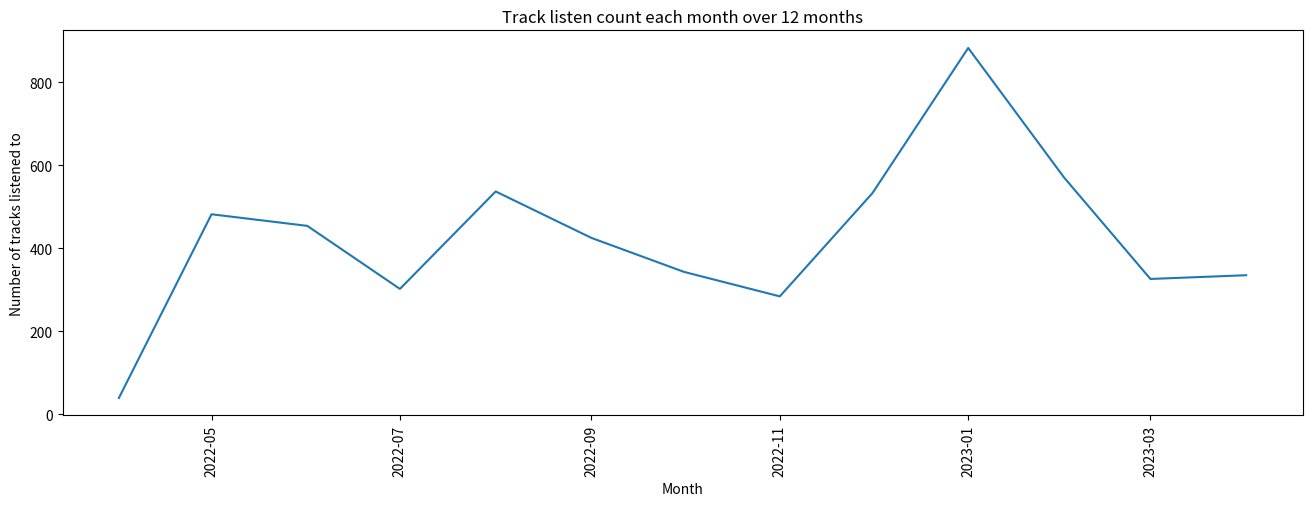

In [5]:
plot(12)

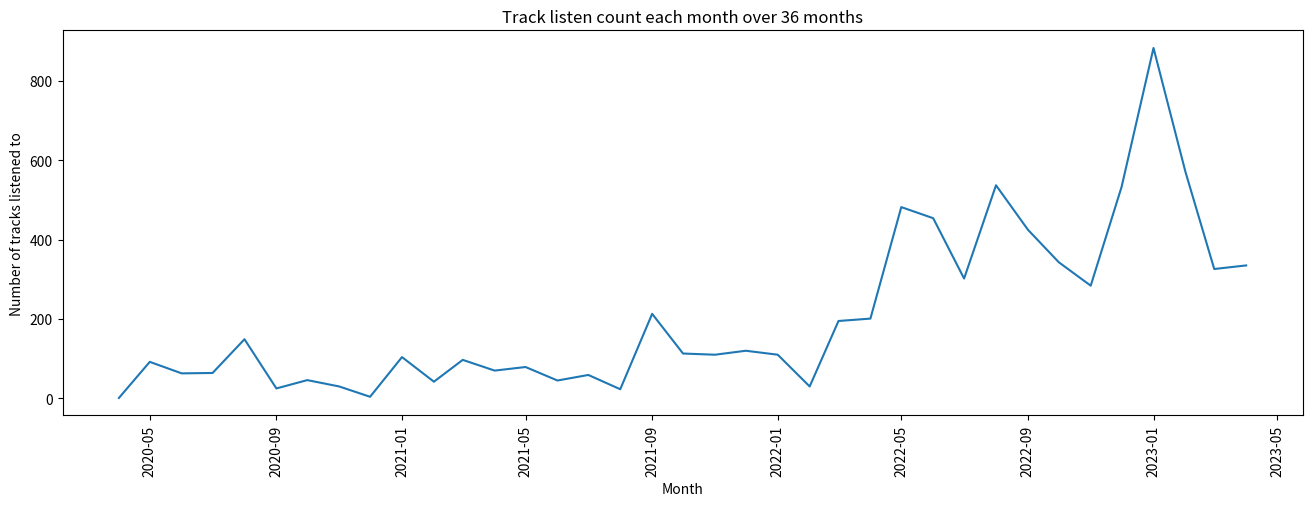

In [6]:
plot(36)

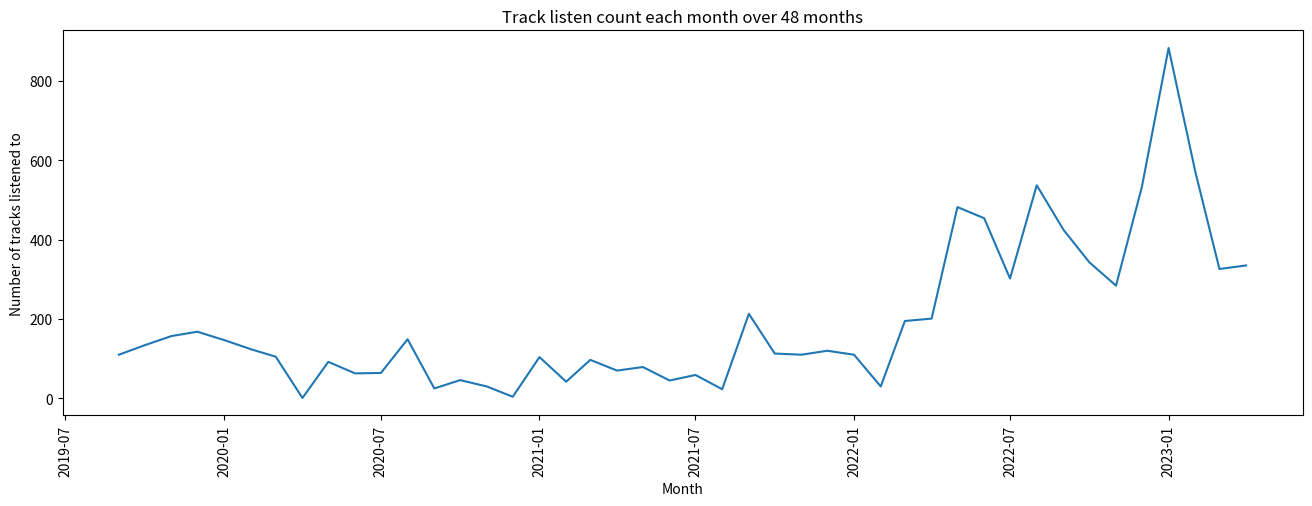

In [7]:
plot(48)

In [8]:
def plot_with_sma(n_months, sma_length):
    twelve_months_of_data = data_for_timeframe(listen_history, n_months)
    twelve_months_of_data_grouped = by_month(twelve_months_of_data)
    twelve_months_of_data_grouped["SMA"] = twelve_months_of_data_grouped["count"].rolling(sma_length).mean()

    plt.figure(figsize=(16, 5))
    plt.xticks(rotation="vertical")
    chart = sns.lineplot(
        data=twelve_months_of_data_grouped,
        x="month",
        y="count",
        linestyle=':'
    )
    sns.lineplot(
        data=twelve_months_of_data_grouped,
        x="month",
        y="SMA"
    )
    chart.set(
        title=f"Track listen count each month over {n_months} months using a {sma_length} month moving average",
        xlabel="Month",
        ylabel="Number of tracks listened to",
    )

    fig = chart.get_figure()
    fig.savefig(f"../reports/figures/monthly_track_listen_count_over_{n_months}_months_with_sma{sma_length}.png")

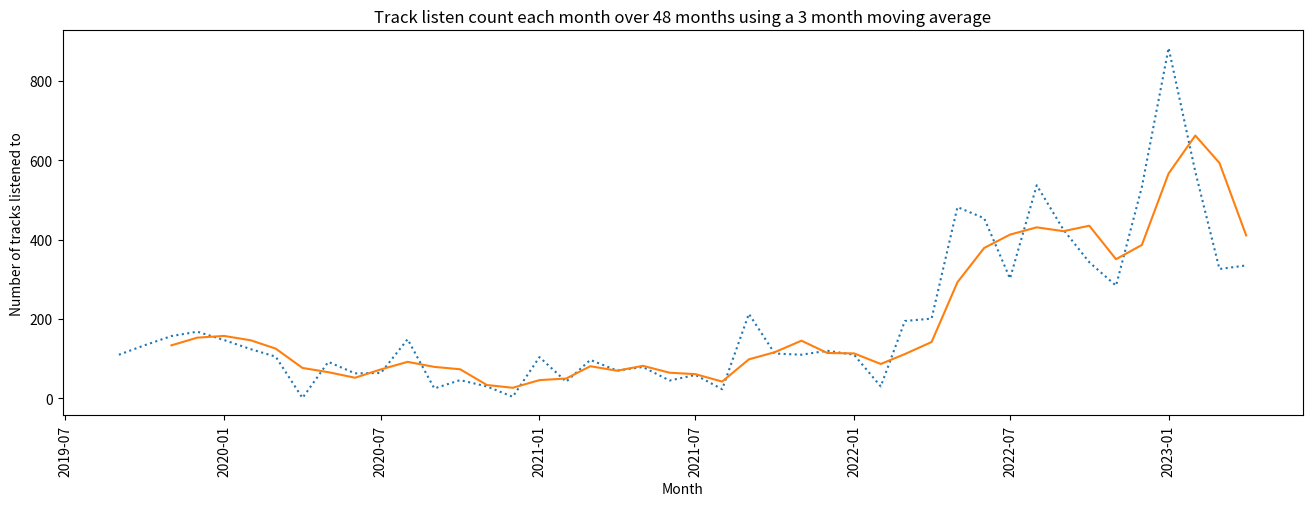

In [9]:
plot_with_sma(48, 3)

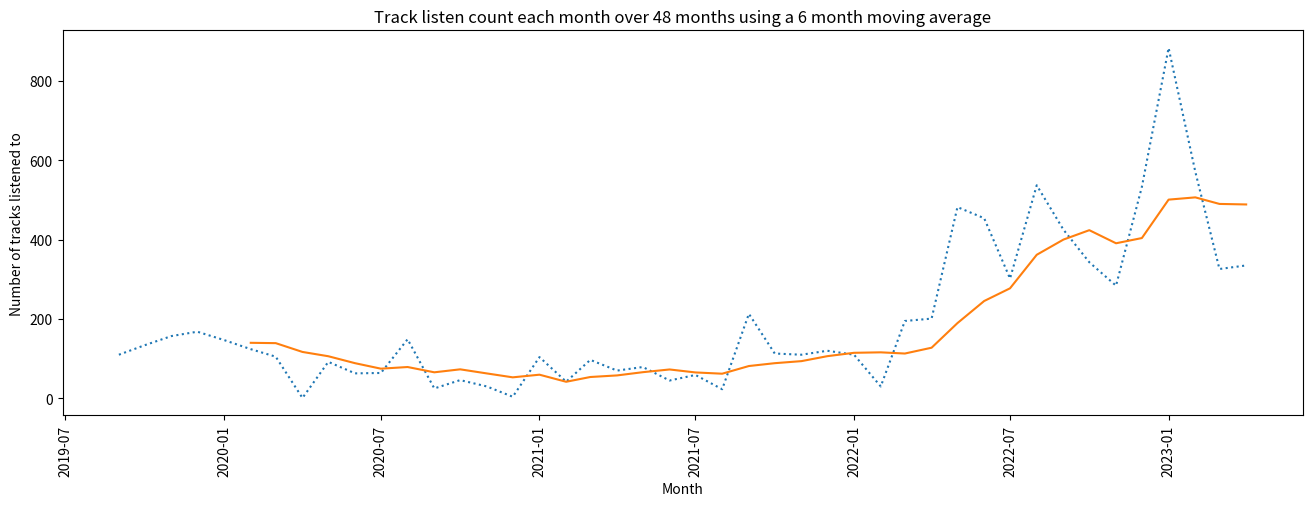

In [10]:
plot_with_sma(48, 6)

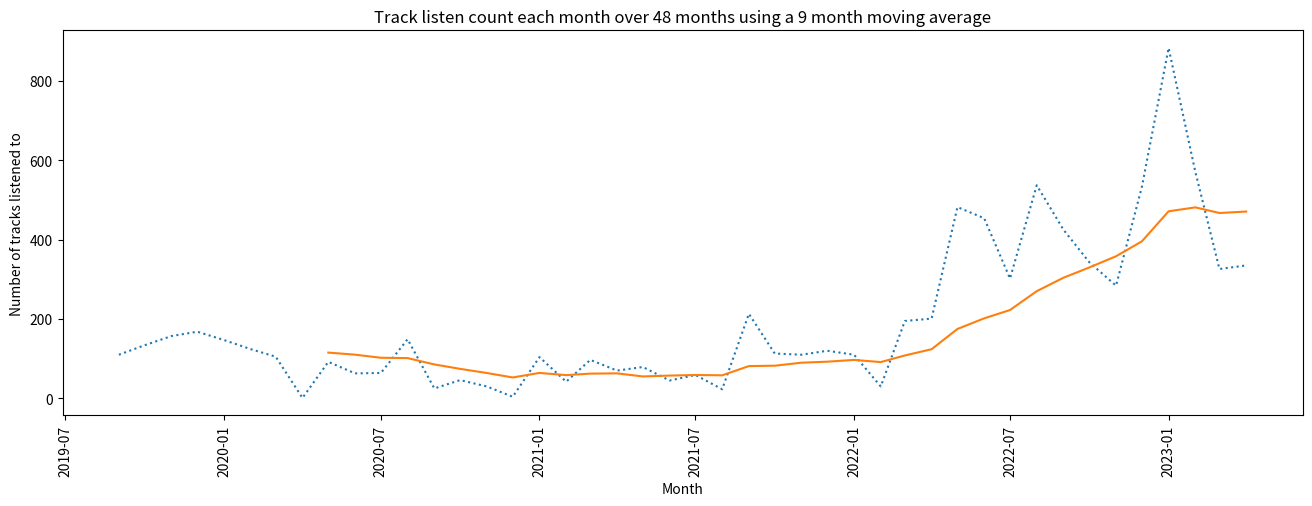

In [11]:
plot_with_sma(48, 9)

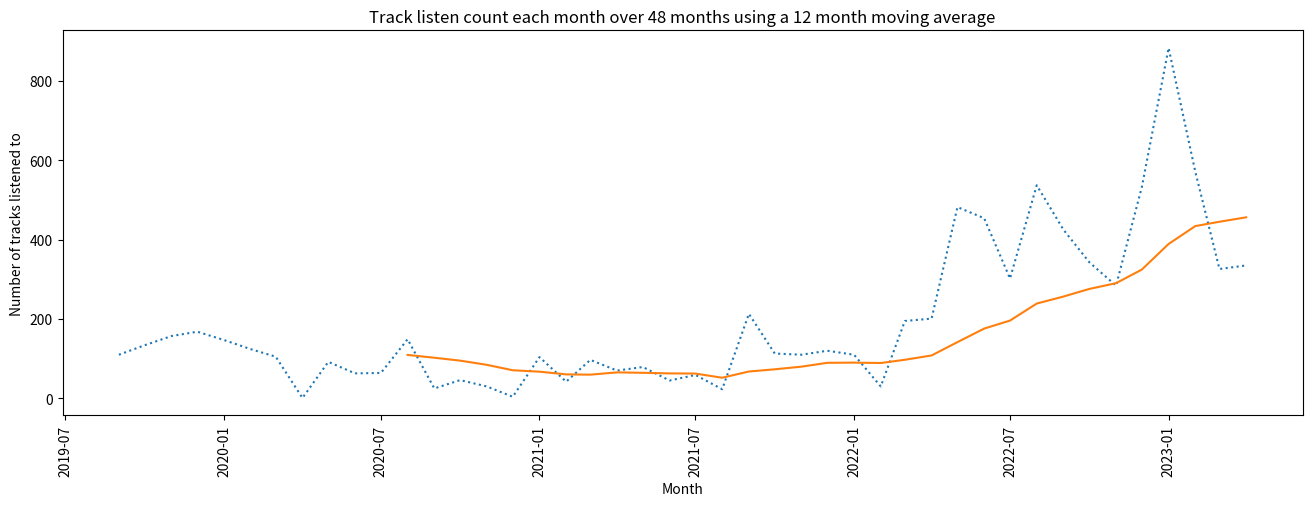

In [12]:
plot_with_sma(48, 12)